In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/prediction-of-purchased-car/Social_Network_Ads.csv


In [2]:
df = pd.read_csv("/kaggle/input/prediction-of-purchased-car/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

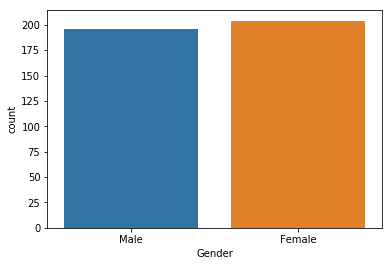

In [4]:
sns.countplot(df['Gender'])

In [5]:
df['EstimatedSalary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

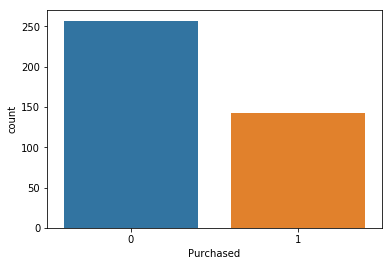

In [6]:
sns.countplot(df['Purchased'])

In [7]:
df['EstimatedSalary'] = pd.cut(df['EstimatedSalary'],bins=10000)
df['Age'] = pd.cut(df['Age'],bins=10)

In [8]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['EstimatedSalary'] = LabelEncoder().fit_transform(df['EstimatedSalary'])
df['Age'] = LabelEncoder().fit_transform(df['Age'])

In [9]:
df = df.drop('User ID',axis=1)
X = df.drop('Purchased',axis=1)
y = df['Purchased']
sc = RobustScaler()
sc.fit(X)
X = sc.transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predict = model.predict(X_test)
accuracy_score(y_test,predict)

0.8787878787878788

In [13]:
model = ExtraTreeClassifier()
model.fit(X_train,y_train)
predict = model.predict(X_test)
accuracy_score(y_test,predict)

0.9015151515151515

In [14]:
model = LogisticRegression()
model.fit(X_train,y_train)
predict = model.predict(X_test)
accuracy_score(y_test,predict)

0.8409090909090909

In [15]:
from keras.models import Sequential
from keras.layers import Dense
X.shape

Using TensorFlow backend.


(400, 3)

In [16]:
model = Sequential()
model.add(Dense(256,input_dim=3,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(X,y,batch_size=1,epochs=10)

Epoch 1/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8425
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2652 - accuracy: 0.8950
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2511 - accuracy: 0.9050
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2326 - accuracy: 0.9200
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2483 - accuracy: 0.9075
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2424 - accuracy: 0.9100
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2303 - accuracy: 0.9200
Epoch 8/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2278 - accuracy: 0.9250
Epoch 9/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2268 - accuracy: 0.9175
Epoch 10/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2318 - accuracy: 0.9175

In [19]:
_,accuracy = model.evaluate(X,y,verbose=0)

In [20]:
str(round(accuracy*100))+"%"

'92%'

In [21]:
model.save("onlineShopper.h5")